# Multiple Linear Regression

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset 

In [57]:
df = pd.read_csv('/workspaces/Supervised-Machine-Learning/Datasets/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [58]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

## Splitting the Data

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=2378
    )

## Compiling the Model

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, 
          y_train,
          )

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Model Coefficients

In [61]:
intercept = model.intercept_
coefficients = model.coef_
print("Intercept:", intercept)
print("Coefficients: {}".format(list(zip(X, coefficients))))

Intercept: 3.045612952025536
Coefficients: [('TV', np.float64(0.04499559433699376)), ('Radio', np.float64(0.18316620740892128)), ('Newspaper', np.float64(-0.00022669859047427798))]


## Prediction of Test set

In [62]:
# Prediction
y_pred = model.predict(X_test)
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Deviation': y_test - y_pred
})
results.head()

,Actual,Predicted,Deviation
80,11.8,11.368759,0.431241
183,26.2,23.846216,2.353784
37,14.7,15.444834,-0.744834
120,15.5,14.301871,1.198129
67,13.4,11.967097,1.432903


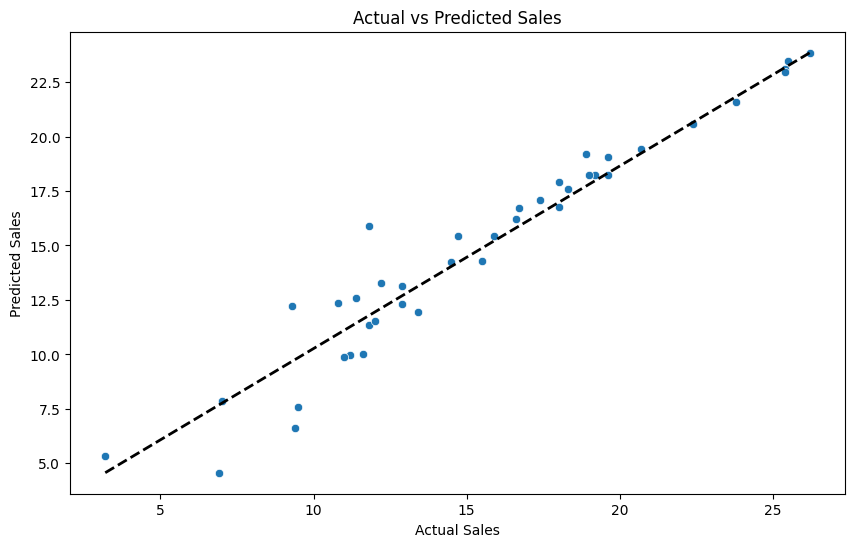

In [68]:
# Plotting 
plt.figure(figsize=(10,6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Predicted'].min(), results['Predicted'].max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

## Calculation Deviation and Accuracy

### Mean Sqaured Error and Root Mean Squared Error

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.4900494716449075
Root Mean Squared Error: 1.5779890594186348


### Mean Absolute Error

In [65]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.2916056702965157


### R2 Score

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9186268979606506


### Training and Test Set Score 

In [67]:
print("Training set Score: {:.4f}".format(model.score(X_train, y_train)))
print("Test set Score: {:.4f}".format(model.score(X_test, y_test)))

Training set Score: 0.8870
Test set Score: 0.9186


## Plotting More

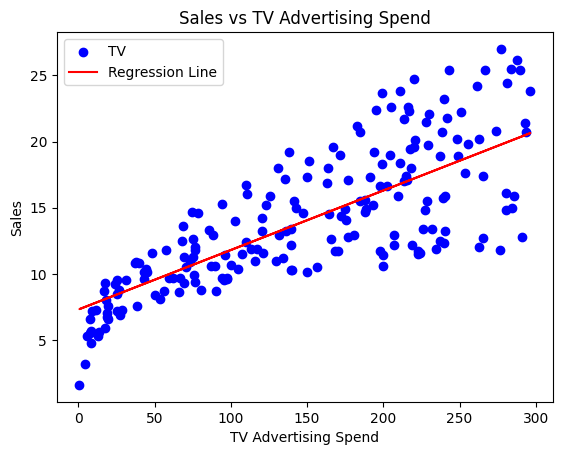

In [70]:
plt.scatter(df['TV'], y, color='blue', label='TV')
plt.plot(df['TV'], 
        model.intercept_ + model.coef_[0]*df['TV'] + model.coef_[1]*df['Radio'].mean() + model.coef_[2]*df['Newspaper'].mean(),
        color='red', 
        label='Regression Line'
        )
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Sales vs TV Advertising Spend')
plt.legend()

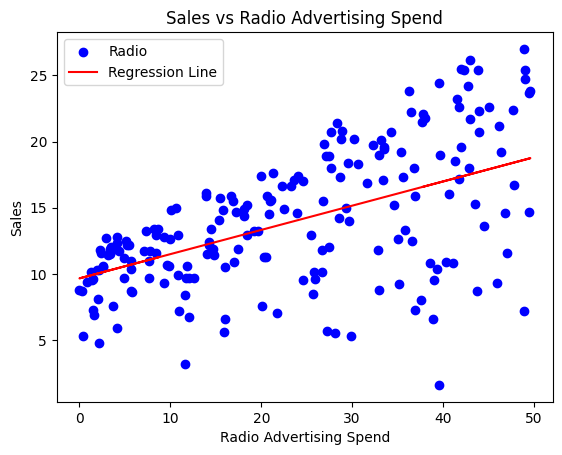

In [71]:
plt.scatter(df['Radio'], y, color='blue', label='Radio')
plt.plot(df['Radio'], 
        model.intercept_ + model.coef_[0]*df['TV'].mean() + model.coef_[1]*df['Radio'] + model.coef_[2]*df['Newspaper'].mean(),
        color='red', 
        label='Regression Line'
        )
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.title('Sales vs Radio Advertising Spend')
plt.legend()

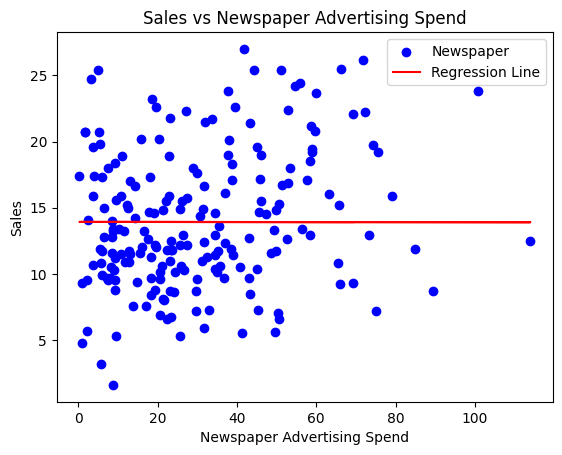

In [72]:
plt.scatter(df['Newspaper'], y, color='blue', label='Newspaper')
plt.plot(df['Newspaper'], 
        model.intercept_ + model.coef_[0]*df['TV'].mean() + model.coef_[1]*df['Radio'].mean() + model.coef_[2]*df['Newspaper'],
        color='red', 
        label='Regression Line'
        )
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.title('Sales vs Newspaper Advertising Spend')
plt.legend()